In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/data'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/data


In [5]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

In [6]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
local_zip = '/content/gdrive/My Drive/data/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/gdrive/My Drive/data/tmp')
zip_ref.close()

In [10]:
train_dir='/content/gdrive/My Drive/data/tmp/corona/train'
valid_dir='/content/gdrive/My Drive/data/tmp/corona/valid'

In [14]:
print(len(os.listdir('/content/gdrive/My Drive/data/tmp/corona/train/CT_covid')))
print(len(os.listdir('/content/gdrive/My Drive/data/tmp/corona/train/CT_normal')))
print(len(os.listdir('/content/gdrive/My Drive/data/tmp/corona/valid/CT_covid')))
print(len(os.listdir('/content/gdrive/My Drive/data/tmp/corona/valid/CT_normal')))


349
397
25
25


In [15]:
from tensorflow.keras.applications import VGG16
vgg = VGG16(weights='imagenet', include_top= False, input_shape=(224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [16]:
model = Sequential()


In [17]:
model.add(vgg)

In [18]:
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
vgg.trainable = False

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                   vertical_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=5, class_mode='binary', target_size=(224,224))

Found 746 images belonging to 2 classes.


In [21]:
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(valid_dir, batch_size=5, class_mode='binary', target_size=(224,224))

Found 50 images belonging to 2 classes.


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

epoch = 10 #@param {type:"slider", min:1, max:100, step:1}

print(f'Epochs: {epoch}...')

history = model.fit(train_generator, epochs=epoch, validation_data=validation_generator)
model.save('vgg.h5')

Epochs: 10...
Epoch 1/10
150/150 [==============================] - 475s 3s/step - loss: 0.5539 - acc: 0.7332 - val_loss: 0.6057 - val_acc: 0.6200
Epoch 2/10
150/150 [==============================] - 472s 3s/step - loss: 0.5202 - acc: 0.7413 - val_loss: 0.6826 - val_acc: 0.6000
Epoch 3/10
150/150 [==============================] - 472s 3s/step - loss: 0.5155 - acc: 0.7574 - val_loss: 0.7282 - val_acc: 0.5600
Epoch 4/10
150/150 [==============================] - 472s 3s/step - loss: 0.5002 - acc: 0.7627 - val_loss: 0.6910 - val_acc: 0.5600
Epoch 5/10
150/150 [==============================] - 474s 3s/step - loss: 0.5055 - acc: 0.7547 - val_loss: 0.7577 - val_acc: 0.5000
Epoch 6/10
150/150 [==============================] - 476s 3s/step - loss: 0.4761 - acc: 0.7694 - val_loss: 0.7371 - val_acc: 0.5600
Epoch 7/10
150/150 [==============================] - 471s 3s/step - loss: 0.4756 - acc: 0.7627 - val_loss: 0.6357 - val_acc: 0.6400
Epoch 8/10
150/150 [==============================] - 4

In [ ]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot( acc)
plt.plot( val_acc)
plt.title('Training and validation accuracy')
plt.figure()

Saving hanith example4.jpeg to hanith example4.jpeg
1/1 [==============================] - 1s 506ms/step


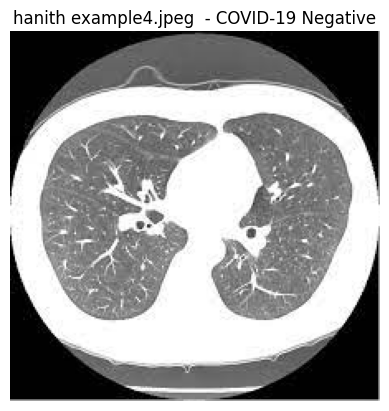

In [40]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 

  path=fn
  import keras.utils as image
  img =image.load_img(path, target_size=(224,224,3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=5)

  plt.imshow(img)
  if (classes[0]>0.5):
    plt.title(fn + "  - COVID-19 Negative" )
  else:
    plt.title(fn + "  - COVID-19 Positive" )
  plt.axis("Off")
  plt.show()